# IE 7300 Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math
from dataclasses import dataclass
from scipy import optimize
from svm_utils  import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
import time
from scipy.stats import norm
from sklearn.metrics import accuracy_score

In [2]:
onp = pd.read_csv('OnlineNewsPopularity.csv')
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
onp.shape

(39644, 61)

In [4]:
onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
onp.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
onp.columns=onp.columns.str.replace(" ","")

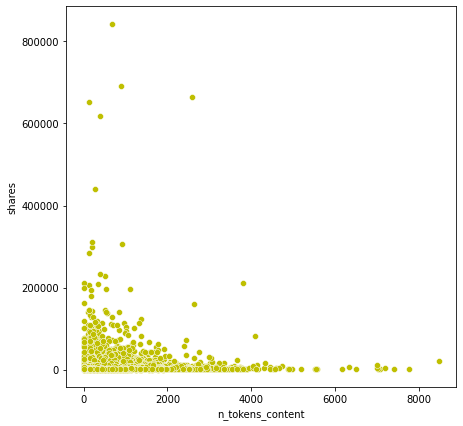

In [7]:
plt.figure(figsize=(7, 7))                 #Checking if the number of words affect the number of shares
shares_plot = sns.scatterplot(y='shares', x='n_tokens_content', data=onp, color='y')

In [8]:
average_shares = onp['shares'].median()
weekdays = onp.columns.values[31:38]
print(weekdays)

['weekday_is_monday' 'weekday_is_tuesday' 'weekday_is_wednesday'
 'weekday_is_thursday' 'weekday_is_friday' 'weekday_is_saturday'
 'weekday_is_sunday']


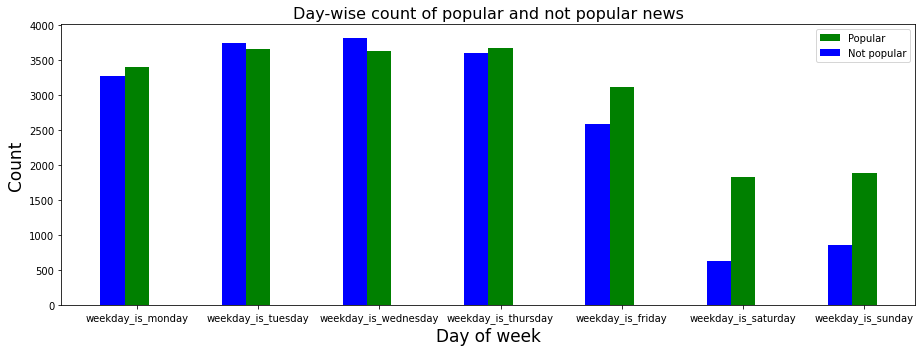

In [9]:
not_popular = onp[onp['shares']<average_shares]
popular = onp[onp['shares']>=average_shares]

not_popular_day = not_popular[weekdays].sum().values
popular_day = popular[weekdays].sum().values

fig = plt.figure(figsize = (13, 5))
plt.title('Day-wise count of popular and not popular news', fontsize=16)

plt.bar(np.arange(len(weekdays)), popular_day, width=0.2, align='center', color='g', label='Popular')
plt.bar(np.arange(len(weekdays))-0.2, not_popular_day, width=0.2, align='center', color='b', label='Not popular')

plt.xticks(np.arange(len(weekdays)), weekdays)
plt.xlabel('Day of week', fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [10]:
word_sentiment = onp.columns.values[48:50]
print(word_sentiment)

['rate_positive_words' 'rate_negative_words']


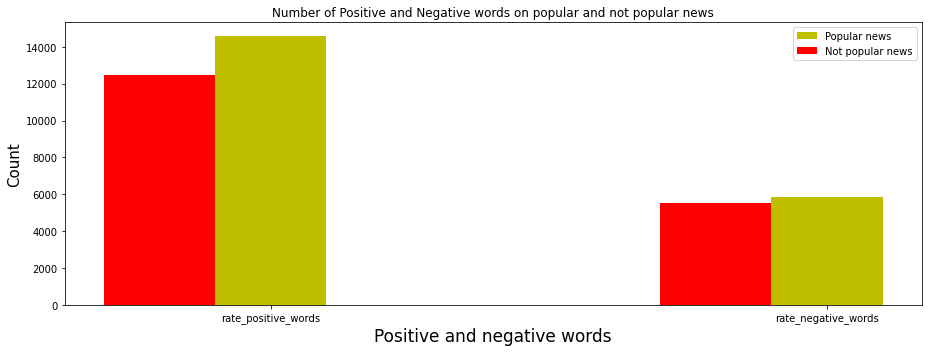

In [11]:
not_popular_senti = not_popular[word_sentiment].sum().values
popular_senti = popular[word_sentiment].sum().values

fig = plt.figure(figsize=(13, 5))
plt.title('Number of Positive and Negative words on popular and not popular news')

plt.bar(np.arange(len(word_sentiment)), popular_senti, width=0.2, align='center', color='y', label='Popular news')
plt.bar(np.arange(len(word_sentiment))-0.2, not_popular_senti, width=0.2, align='center', color='r', label='Not popular news')

plt.xticks(np.arange(len(word_sentiment)),word_sentiment)
plt.xlabel('Positive and negative words', fontsize=17)
plt.ylabel('Count', fontsize=15)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

C:\Users\amool\AppData\Local\Temp/ipykernel_16440/907910737.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

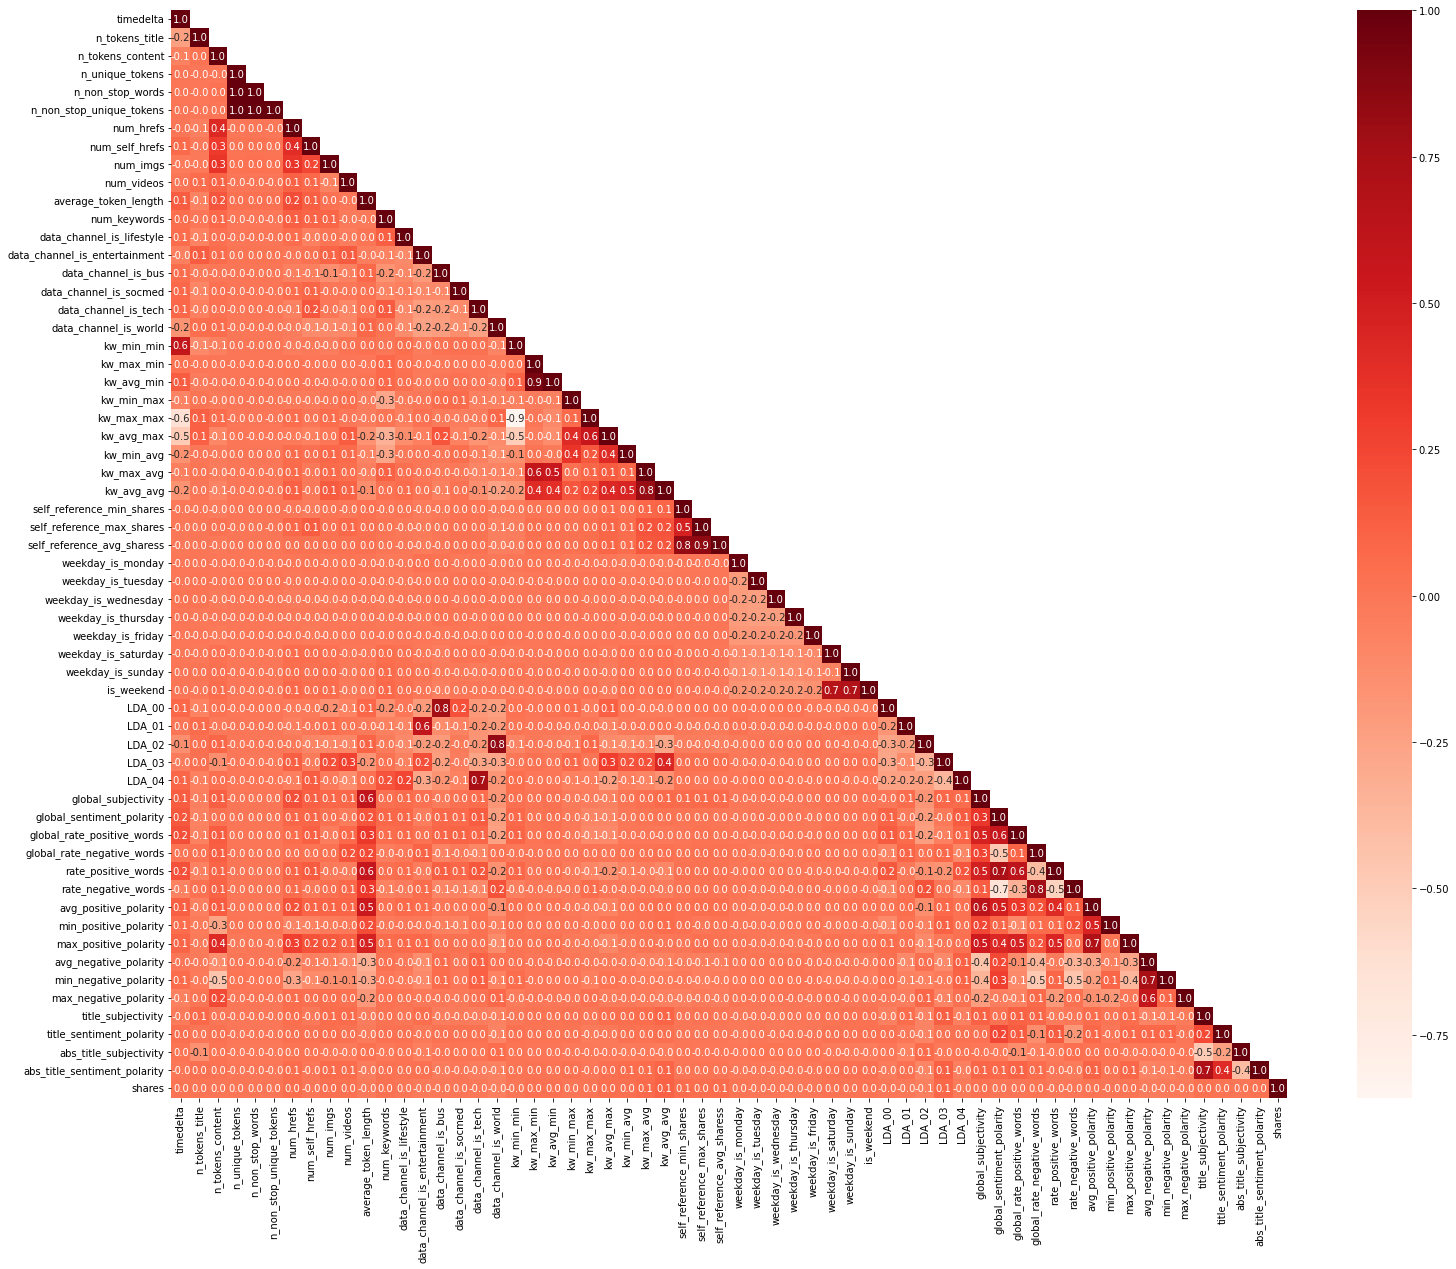

In [12]:
cor=onp.corr()
plt.figure(figsize=(25,20))
onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(onp1,cmap='Reds', annot=True, fmt=".1f")

In [13]:
# Dropping:
# 'URL' as it is a non-numeric attribute and is not valuable to our analysis 
# 'timedelta' as it is not a feature, but a non-predictive attribute
# 'n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min' , 'kw_max_max', 'kw_avg_avg', 'LDA_00', 'LDA_02', 'rate_negative_words', 'self_reference_avg_sharess' as they are highly correlated attributes
onp= onp.drop(["url","timedelta","n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min", "kw_max_max", "kw_avg_avg", "LDA_00", "LDA_02", "rate_negative_words", "self_reference_avg_sharess"],axis=1)

<AxesSubplot:>

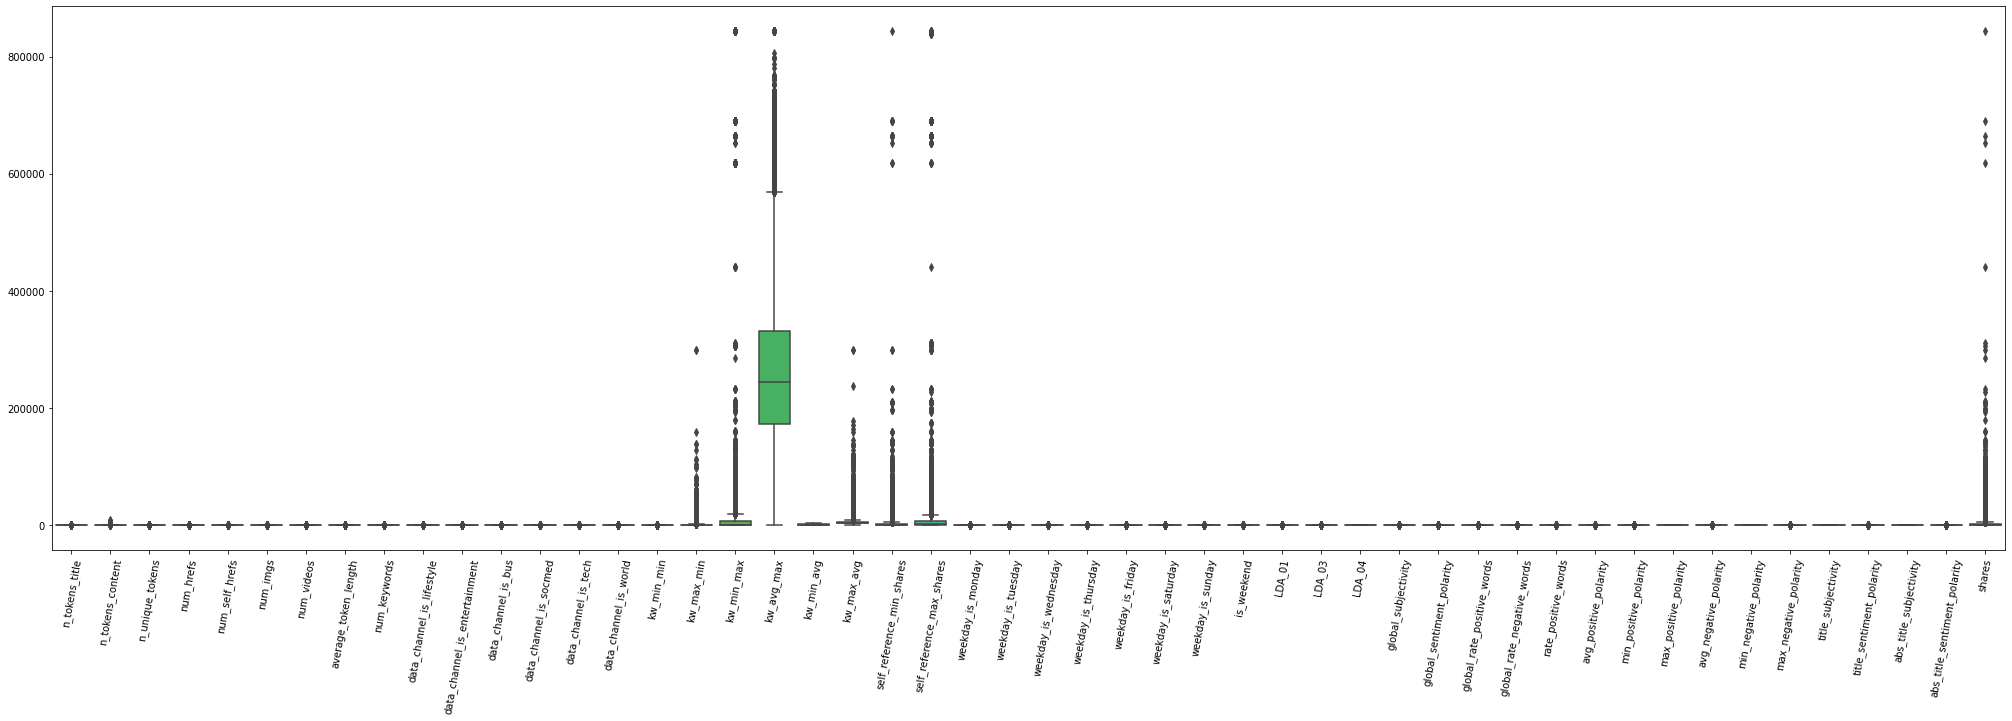

In [14]:
#numerical = onp.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(35,10))
plt.xticks(rotation=80)
sns.boxplot(data = onp)

In [15]:
numerical_onp = onp.drop(["data_channel_is_tech","data_channel_is_world","data_channel_is_lifestyle",
                          "data_channel_is_entertainment","data_channel_is_bus", "data_channel_is_socmed", 
                          "is_weekend", "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday",
                          "weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"],axis=1)

categorical_onp = onp[["data_channel_is_tech","data_channel_is_world","data_channel_is_lifestyle",
                       "data_channel_is_entertainment","data_channel_is_bus", "data_channel_is_socmed", 
                       "is_weekend", "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday",
                       "weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"]]

In [16]:
numerical_onp = numerical_onp.drop('shares',axis=1)

In [17]:
negative_columns = numerical_onp.columns[(numerical_onp<=0).any()]
negative_columns

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares', 'LDA_01',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [18]:
#The distribution has a lot of negative values and isn't normal, so will be using box-cox method of scaling 
for i in negative_columns:                   #new features are created by converting negative into positive values
    minimum = numerical_onp[i].min()
    new_name = i +'_1'
    numerical_onp[new_name] = ((numerical_onp[i]+1) - minimum)

In [19]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'n_tokens_content_1',
       'n_unique_tokens_1', 'num_hrefs_1', 'num_self_hrefs_1', 'num_imgs_1',
       'num_videos_1', 'average_token_length_1', 'kw_min_min_1',
       'kw_max_min_1', 'kw_min_ma

In [20]:
for i in negative_columns:
    numerical_onp.drop(i,axis=1,inplace=True) #Dropped old negative columns

In [21]:
negative_columns = numerical_onp.columns[(numerical_onp<=0).any()]
negative_columns

Index([], dtype='object')

In [22]:
power_transf=preprocessing.PowerTransformer(method='box-cox',standardize=False)
numerical_onp1=power_transf.fit_transform(numerical_onp)
numerical_onp1=(pd.DataFrame(numerical_onp1,columns=numerical_onp.columns))

In [23]:
ss = StandardScaler()
numerical_onp[:] = ss.fit_transform(numerical_onp1)

In [24]:
def remove_outliers(array, k=1.5):
    ll = array.mean() - k*array.std()
    ul = array.mean() + k*array.std()
    array[array < ll] = ll
    array[array > ul] = ul
    return array

In [25]:
numerical_onp = numerical_onp.apply(remove_outliers)

<AxesSubplot:>

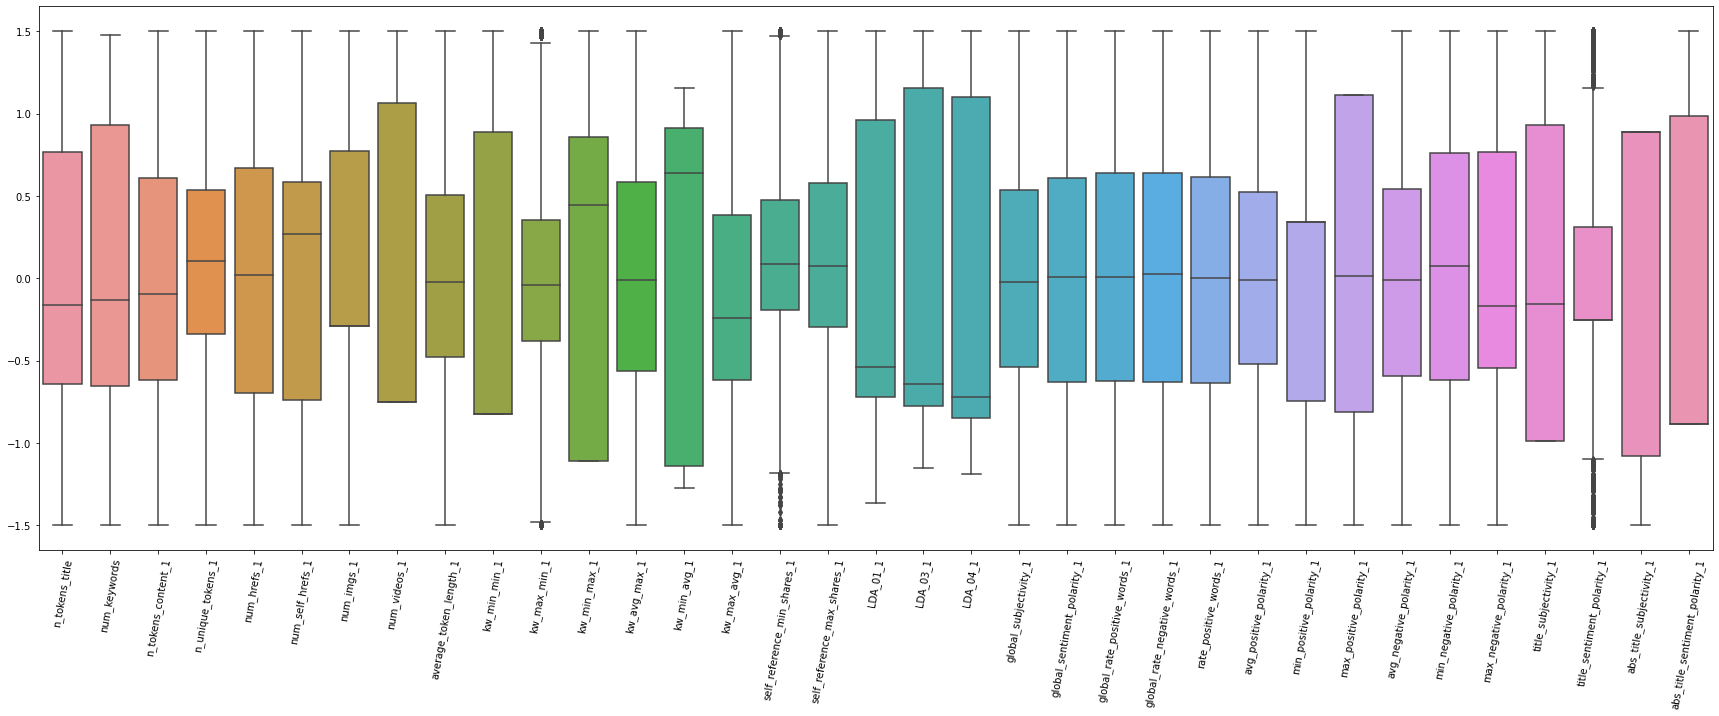

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=80)
sns.boxplot(data = numerical_onp)

In [27]:
categorical_onp.columns

Index(['data_channel_is_tech', 'data_channel_is_world',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'is_weekend',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')

In [28]:
numerical_onp.columns

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_1',
       'n_unique_tokens_1', 'num_hrefs_1', 'num_self_hrefs_1', 'num_imgs_1',
       'num_videos_1', 'average_token_length_1', 'kw_min_min_1',
       'kw_max_min_1', 'kw_min_max_1', 'kw_avg_max_1', 'kw_min_avg_1',
       'kw_max_avg_1', 'self_reference_min_shares_1',
       'self_reference_max_shares_1', 'LDA_01_1', 'LDA_03_1', 'LDA_04_1',
       'global_subjectivity_1', 'global_sentiment_polarity_1',
       'global_rate_positive_words_1', 'global_rate_negative_words_1',
       'rate_positive_words_1', 'avg_positive_polarity_1',
       'min_positive_polarity_1', 'max_positive_polarity_1',
       'avg_negative_polarity_1', 'min_negative_polarity_1',
       'max_negative_polarity_1', 'title_subjectivity_1',
       'title_sentiment_polarity_1', 'abs_title_subjectivity_1',
       'abs_title_sentiment_polarity_1'],
      dtype='object')

In [29]:
final_onp=pd.concat([numerical_onp,categorical_onp],axis=1)

In [30]:
median = onp['shares'].median()

In [31]:
final_onp['popularity'] = onp['shares'].apply(lambda x: 0 if x < median else 1)

In [32]:
final_onp.shape

(39644, 50)

In [33]:
final_onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   n_tokens_title                  39644 non-null  float64
 1   num_keywords                    39644 non-null  float64
 2   n_tokens_content_1              39644 non-null  float64
 3   n_unique_tokens_1               39644 non-null  float64
 4   num_hrefs_1                     39644 non-null  float64
 5   num_self_hrefs_1                39644 non-null  float64
 6   num_imgs_1                      39644 non-null  float64
 7   num_videos_1                    39644 non-null  float64
 8   average_token_length_1          39644 non-null  float64
 9   kw_min_min_1                    39644 non-null  float64
 10  kw_max_min_1                    39644 non-null  float64
 11  kw_min_max_1                    39644 non-null  float64
 12  kw_avg_max_1                    

In [34]:
X = final_onp.drop(['popularity'], axis = 1)
y = final_onp['popularity']

In [35]:
class LogisticRegression:
    
    def __init__(self, X, y, learningRate, tolerance, maxIteration, batchSize):
        
        self.X= X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.batchSize = batchSize
        
        
    def splitData(self):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        X_train = self.add_X0(X_train)
        X_valid = self.add_X0(X_valid)
        X_test = self.add_X0(X_test)
        return X_train, X_valid, X_test, y_train, y_valid, y_test

    
    # Normalizing the training dataset using Z-score
#     def normalize(self, X):
#         mean = np.mean(X, 0)
#         std = np.std(X, 0)
        
#         X_norm = (X-mean) / std
#         X_norm = self.add_X0(X_norm)
#         return X_norm, mean, std
    
    
#     def normalizeTestData(self, X, train_mean, train_std):
#         X_norm = (X - train_mean) / train_std
#         X_norm = self.add_X0(X_norm)
#         return X_norm
    
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self,z):
        sig = 1 / ( 1 + np.exp(-z))
        return sig
    
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def costFunction(self, X, y):
        pred =np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred.sum( )
        return cost
    
    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        # sig = self.sigmoid(self.predict(X))
        grad = (sig -y ).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in range(self.maxIteration):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            curr = self.costFunction(X,y)
            
            diff = last - curr
            #last - curr
            last = curr
            
            errors.append(curr)
            
            if diff < self.tolerance:
                print("The model stopped Learning")
                break
        # self.plot_cost(errors)

    def stochasticGD(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
        XY = np.c_[X.reshape(X.shape[0], X.shape[1]), y.reshape(X.shape[0], 1)]
        
        
        # Set seed
        np.random.seed(2022)
        errors = []
        
        for i in tqdm(range(self.maxIteration)):
                    
        # Shuffle x and y
            np.random.shuffle(XY)

            start = 0
            stop = start + self.batchSize
            X_batch, y_batch = XY[start:stop, :-1], XY[start:stop, -1]

          
            last_error = float('inf')

          # Recalculating the difference
            self.w = self.w - self.learningRate * self.gradient(X_batch, y_batch)
            current_error = self.costFunction(X, y)
         
            diff = last_error - current_error
            last_error = current_error

            errors.append(current_error)
            if np.abs(diff) < self.tolerance:
                print('Model stopped learning')
                break
        
        print(self.w)
        
        
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        #accuracy = np.sum(np.equal(y_true, y_hat)) / len(y_true)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        
        return accuracy, precision, recall
    
    def fit(self):

        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        self.w = np.dot(np.ones(X_train.shape[1], dtype = np.float64), 0)
        self.stochasticGD(X_train, y_train)
        # self.gradientDescent(X_train, y_train)
        y_hat_train = self.predict(X_train)
        accuracy, precision, recall = self.evaluate(y_train,y_hat_train)
        return accuracy, precision, recall
        
    def validation(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_valid = self.predict(X_valid)

        accuracy, precision, recall  = self.evaluate(y_valid, y_hat_valid)
        return accuracy, precision, recall

    def test(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_test = self.predict(X_test)
        accuracy, precision, recall  = self.evaluate(y_test, y_hat_test)
        return accuracy, precision, recall        

In [36]:
lr = LogisticRegression(X, y, learningRate = 0.001, tolerance = 0.001, maxIteration = 1000, batchSize=128)
log_base_train_acc = lr.fit()
log_base_valid_acc = lr.validation()
log_base_test_acc = lr.test()
display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.45it/s]


[ 0.23011965 -0.00569703 -0.04629501 -0.11866396 -0.22933436  0.151718
 -0.18358442  0.063227    0.08737339 -0.09405538  0.06829088  0.04427198
  0.03782654 -0.14312371 -0.05159604  0.40523401  0.24084313  0.11813926
 -0.07728844  0.01126788  0.03825963  0.14660786  0.05274389  0.02376711
 -0.01722133  0.01900672 -0.04495281 -0.13340767 -0.00146559  0.01571423
  0.0529878  -0.02918518  0.06786098  0.0744608   0.07390067  0.03324426
  0.45230265 -0.5196671  -0.09993118 -0.52312171  0.15541893  0.62166699
  0.56471913 -0.06372845 -0.16843243 -0.18260216 -0.02905222  0.10921579
  0.36874694  0.19597219]


(0.6514864864864864, 0.6660869565217391, 0.7057542507747717)

(0.6387387387387388, 0.6400123494905835, 0.7118818681318682)

(0.6425929039852026, 0.6503516998827668, 0.7041091543709345)

In [37]:
class GaussianNaiveBayes:
    
      
#     def __init__(self, X, y) -> None:
#         self.X = X
#         self.y = y
        

#     def splitData(self):
#         self.X_train, self.X_valid, self.X_test, = XTrain_mixture.apply(pd.to_numeric), XValid_mixture.apply(pd.to_numeric), XTest_mixture.apply(pd.to_numeric)
#         self.y_train, self.y_valid, self.y_test = yTrain, yValid, yTest

      # def min_max_scaling(col):
      #   return (col - col.min())/(col.max() - col.min())

      # def normalize(self, X):
      #   for i in range(X.shape[1]):
      #     if len(X.iloc[:,i].unique())>2:
      #       X.iloc[:,i] = self.min_max_scaling(X.iloc[:,i])


    def fitDistribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean,std)
        return dist

    def probability(self, x, y, prior):
        prob = prior
        for col in X_train.columns:    
            prob *= self.distributions[y][col].pdf(x[col])
        return prob

    def fit(self, X_train, y_train):
        #self.splitData()

        self.distributions = {0:{},1:{}}

        X0_train = X_train.iloc[np.where(y_train == 0)[0]]
        X1_train = X_train.iloc[np.where(y_train == 1)[0]]

        self.prior0 = len(X0_train) / len(X_train)
        self.prior1 = len(X1_train) / len(X_train)

        for col in X_train.columns:
            self.distributions[0][col] = self.fitDistribution(X0_train[col])
            self.distributions[1][col] = self.fitDistribution(X1_train[col])

    def train(self, X_train, y_train):
        y_hat_train = []
        for idx in X_train.index:
              # posterior is updated based on probabilites of test values
            py_0 = self.probability(X_train.loc[idx, :], 0, self.prior0) 
            py_1 = self.probability(X_train.loc[idx, :], 1, self.prior1)
            y_hat_train.append(np.argmax([py_0,py_1]))

        acc_tr = np.sum(np.equal(y_train, y_hat_train)) / len(y_train)
        return acc_tr

    def validation(self, X_valid, y_valid):

        y_hat_valid = []
        for idx in X_valid.index:
              # posterior is updated based on probabilites of test values
            py_0 = self.probability(X_valid.loc[idx, :], 0, self.prior0) 
            py_1 = self.probability(X_valid.loc[idx, :], 1, self.prior1)
            y_hat_valid.append(np.argmax([py_0,py_1]))

        acc_va = np.sum(np.equal(y_valid, y_hat_valid)) / len(y_valid)
        return acc_va
    
    def test(self, X_test, y_test):

        y_hat_test = []
        for idx in X_test.index:
                # posterior is updated based on probabilites of test values
            py_0 = self.probability(X_test.loc[idx, :], 0, self.prior0) 
            py_1 = self.probability(X_test.loc[idx, :], 1, self.prior1)
            y_hat_test.append(np.argmax([py_0,py_1]))

        acc_te = np.sum(np.equal(y_test, y_hat_test)) / len(y_test)
        return acc_te

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [39]:
X_train_arr = np.asarray(X_train)
y_train_arr = np.where(y_train==0, -1, 1)
X_valid_arr = np.asarray(X_valid)
y_valid_arr = np.where(y_valid==0, -1, 1)
X_test_arr = np.asarray(X_test)
y_test_arr = np.where(y_test==0, -1, 1)

In [40]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

In [41]:
gnb_train_accuracy = gnb.train(X_train, y_train)
gnb_valid_accuracy = gnb.validation(X_valid, y_valid)
gnb_test_accuracy = gnb.test(X_test, y_test)

display(gnb_train_accuracy, gnb_valid_accuracy, gnb_test_accuracy)

0.6147747747747748

0.6103303303303304

0.6038338658146964

In [42]:
class SVM:
    def __init__(self, learningRate=0.0001, lambda_=0.001, nIterations=1000):
        self.learningRate = learningRate
        self.lambda_ = lambda_
        self.nIterations = nIterations
        
    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0
        
        # Gradient Descent
        # Cost function
            # 
        # Gradient
            # y_i*(wx_i + b) >= 1, then d_w = 2*lambda_*w 
            # otherwise, then d_w = 2*lambda_*w - y_i*x_i,  d_b = -y_i
        for i in range(self.nIterations):
            for idx, x_i in enumerate(X):
                condtions = y[idx] * np.dot(self.w, x_i + self.b)
                if condtions >= 1:
                    # only for w
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w)
                else:
                    # update both w and b
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w - np.dot(y[idx], x_i))
                    self.b = self.b - self.learningRate * (-y[idx])
    
    def predict(self, X):
        pred_ = np.dot(X, self.w) + self.b
        return np.sign(pred_)

In [43]:
svm_hard = SVM()
svm_hard.fit(X_train_arr, y_train_arr)

In [44]:
svm_hard.w

array([-2.31556548e-02, -5.94421788e-03, -1.38444174e-01, -2.26289983e-01,
        1.44547830e-01, -1.84599579e-01,  4.72450660e-02,  1.07564478e-01,
       -5.36174136e-02,  3.49517031e-02,  4.23568397e-02,  1.19961254e-01,
       -7.85899374e-02, -9.93561191e-02,  3.82340050e-01,  2.09348297e-01,
        7.95180172e-02, -5.74961559e-02,  2.59925772e-02,  3.68394718e-02,
        1.07158407e-01,  4.26029390e-02,  6.06598844e-04,  4.57527939e-02,
        2.26403462e-02, -5.24337324e-02, -1.13794406e-01, -8.43494143e-03,
       -1.04672955e-02,  2.97726134e-02, -2.41196126e-03,  2.98386765e-02,
        1.75741808e-02,  5.16190953e-02,  7.91893244e-03,  5.60476659e-01,
       -9.20609316e-01,  1.77797051e-02, -9.97057574e-01, -5.05816148e-02,
        6.27080656e-01,  5.32138593e-01, -6.07926099e-02, -1.45095805e-01,
       -1.70192742e-01, -8.42772924e-02,  6.25817600e-02,  3.64650472e-01,
        1.67488121e-01])

In [45]:
svm_hard.b

1.0159999999999045

In [46]:
svm_hard.predict(X_test_arr)

array([1., 1., 1., ..., 1., 1., 1.])

In [47]:
svm_hard_train_accuracy = np.sum(svm_hard.predict(X_train_arr) == y_train_arr) / np.size(y_train_arr)
svm_hard_valid_accuracy = np.sum(svm_hard.predict(X_valid_arr) == y_valid_arr) / np.size(y_valid_arr)
svm_hard_test_accuracy = np.sum(svm_hard.predict(X_test_arr) == y_test_arr) / np.size(y_test_arr)
svm_hard_test_accuracy

0.6215739028081385

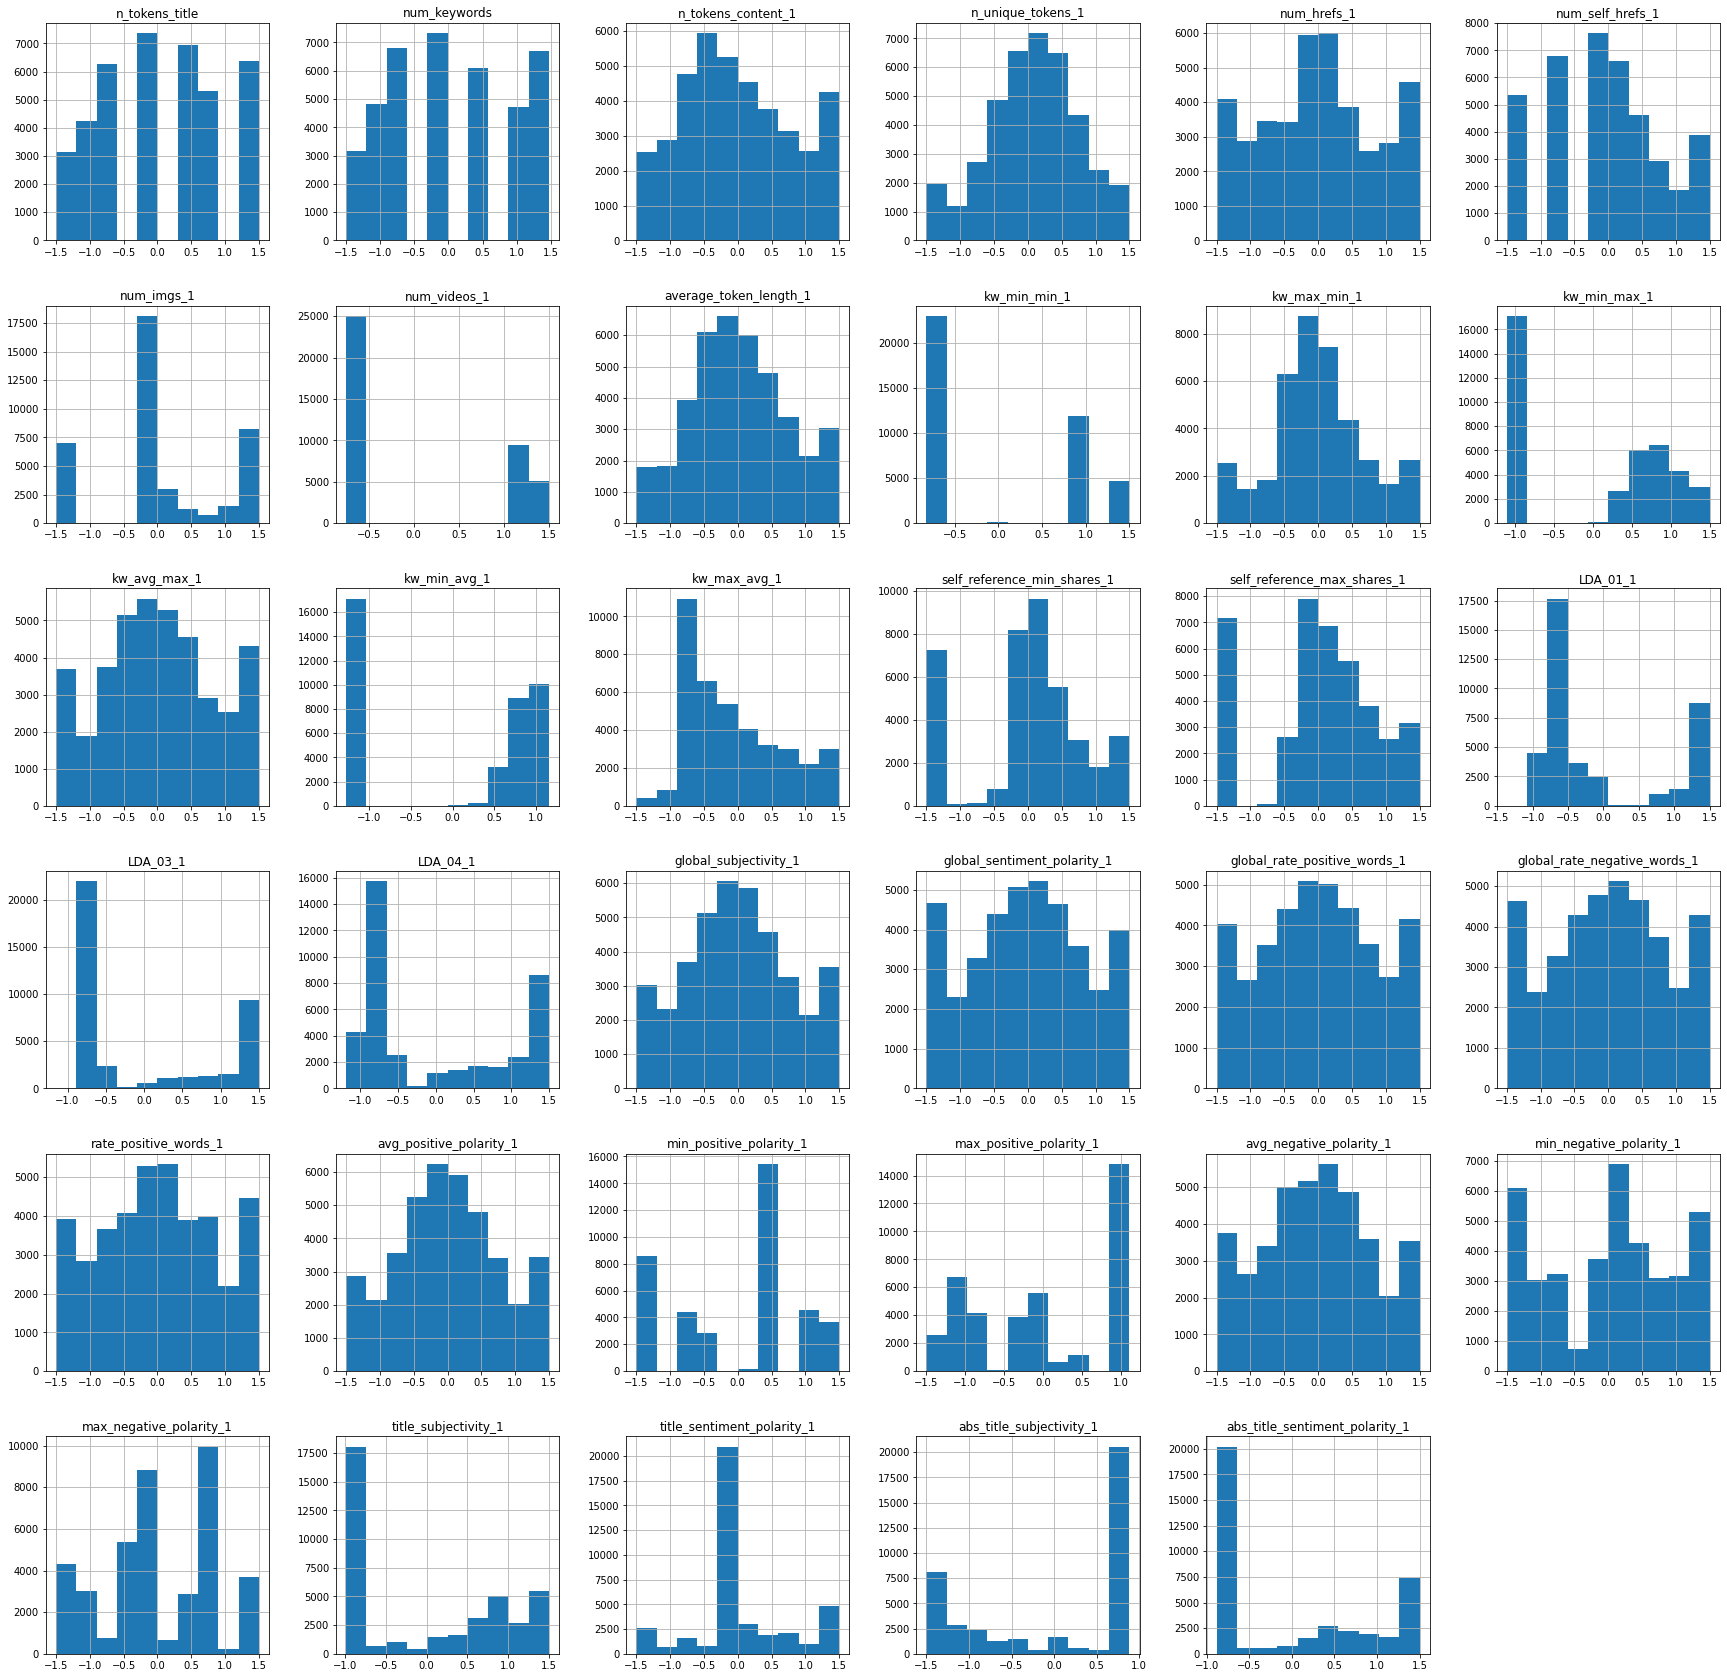

In [48]:
numerical_onp.hist(figsize=(30,30))
plt.show()